## Instructions

We can skip the next cell if neural_de was installed from pip install.

In [1]:
import sys
sys.path.append("..")

Let's import from neural_de the rain removal method

In [2]:
from neural_de.transformations import DeRainEnhancer

We load an example image

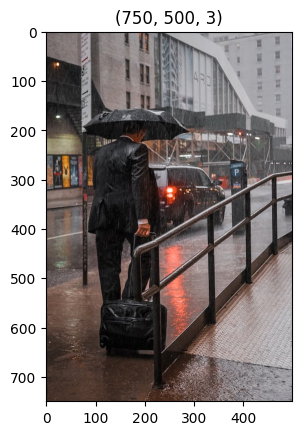

In [3]:
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
import os

input_path = Path('../examples/images/street-rain-men.jpeg')
image = cv2.imread(str(input_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title(image.shape)
plt.imshow(image)

## Enhancing an image

We create an instance of ResolutionShift :
- Please note that this method require an access to MinIO in order to retrieve model's weights (at least once, they will then be stored directly on the machine). Once the model is downloaded you can remove or comment the following cell.

In [4]:
shifter = DeRainEnhancer()

[11-06 10:51:56] {C:\Users\marc.lacourt\PycharmProjects\neuralde\examples\..\neural_de\utils\_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]
[11-06 10:51:56] {C:\Users\marc.lacourt\PycharmProjects\neuralde\examples\..\neural_de\transformations\_derain_enhancer.py:55} INFO - Checking model availability...
[11-06 10:52:00] {C:\Users\marc.lacourt\PycharmProjects\neuralde\examples\..\neural_de\utils\_minio.py:95} INFO - Model downloaded and validated
[11-06 10:52:00] {C:\Users\marc.lacourt\PycharmProjects\neuralde\examples\..\neural_de\transformations\_derain_enhancer.py:74} INFO - Trained model GT-rain loaded


We apply the transform method to any number of images. 
- we can have multiple images per call of transform, and call transform multiple time with the same shifter.
- for now, only ratio=2 is available for upsampling, as the underlaying transformer was trained for a 2x resolution.

In [5]:
derained_images = shifter.transform([image])

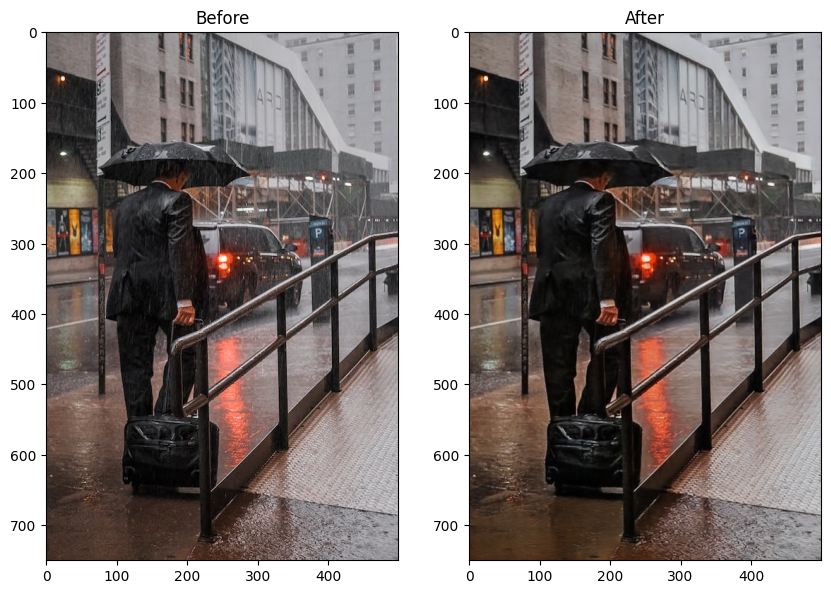

In [6]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Before")
plt.imshow(image)
plt.subplot(1,2,2)
plt.title("After")
plt.imshow(derained_images[0])
plt.show()